<a href="https://colab.research.google.com/github/sabrinadvep/introduction_to_machine_learning/blob/main/CUSTOMER_SEGMENTS_LINK_NET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the .xlsx file
df = pd.read_excel("dataset.xlsx")
df.head()

,Customer ID,Account Status,Industry Segment,Industry Segment Short,Owner Division,Owner Departement,Date Difference Between Today and Start Date First Contract,CONNECTIVITY,CORPORATE TV,ICT SOLUTION,...,Freeze,Inactive,Total SID,Status Customer by SID Status,MRC,Revenue,Company Size,Longevity,Terminate Date to Today,LONGEVITY MANUAL
0,D00351,Inactive,Government & Public Services,Gov,Government & Regional,Government Non Military,865,1,0,0,...,0,1,1,Inactive,0.0,0.000000e+00,NaN,0,865.0,0
1,B00677,Active,Government & Public Services,Gov,Government & Regional,Government Non Military,1991,21,1,0,...,1,15,22,Active,129300000.0,3.551470e+09,Large Enterprise,6,75.0,6
2,B00594,Active,Government & Public Services,Gov,Government & Regional,Government Non Military,1382,1,0,0,...,0,0,1,Active,0.0,9.909910e+07,Large Enterprise,6,103.0,4
3,K00297,Inactive,General Business,Genbiz,Government & Regional,Government Non Military,1561,2,0,0,...,0,2,2,Inactive,0.0,0.000000e+00,NaN,0,1564.0,0
4,C00024,Active,Wholesales & Telco,IT/SI,Corporate Account Management,General Business,4117,8,2,0,...,0,12,14,Active,8000000.0,5.764516e+07,SME,11,256.0,4


In [ ]:
selected_cols = [
    'Industry Segment',
    'Owner Division',
    'CONNECTIVITY',
    'CORPORATE TV',
    'ICT SOLUTION',
    'PROFESSIONAL SERVICES',
    'Active',
    'Freeze',
    'Inactive',
    'Total SID',
    'MRC',
    'Revenue',
    'Company Size ',
    'Longevity',
    'LONGEVITY MANUAL'
]

df_cluster = df[selected_cols].copy()


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Clean column names (e.g., trailing spaces)
df_cluster.columns = df_cluster.columns.str.strip()

# Encode categoricals
label_cols = df_cluster.select_dtypes(include='object').columns
for col in label_cols:
    df_cluster[col] = LabelEncoder().fit_transform(df_cluster[col])

# Scale features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]


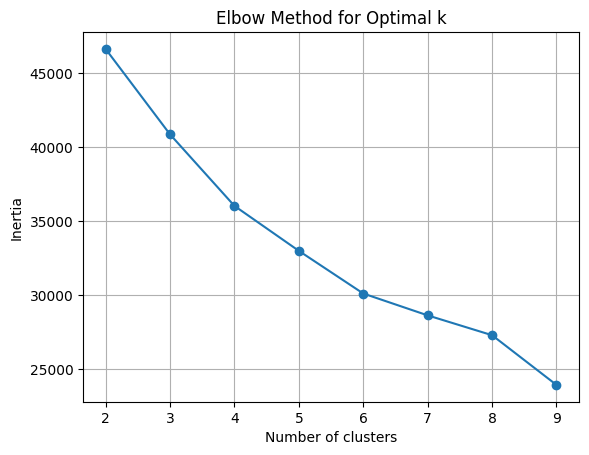

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Elbow method
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 10), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [ ]:
optimal_k = 6  # or based on elbow chart
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Segment'] = kmeans.fit_predict(df_scaled)

# Now, let's also strip it in df (main dataframe) to match:
df.columns = df.columns.str.strip()

# Then update the hover_data reference:
fig = px.scatter(
    df, x='PCA1', y='PCA2',
    color='Segment',
    hover_data=['Customer ID', 'Industry Segment', 'Owner Division', 'Company Size', 'Revenue']
)
fig.show()


In [ ]:
df[['Customer ID', 'Segment', 'PCA1', 'PCA2'] + list(df_cluster.columns)].to_excel('Customer_Segments.xlsx', index=False)


In [ ]:
from google.colab import files
files.download('Customer_Segments.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>